In [1]:
from GPUCBAgent2 import GPUCBAgent
from StochasticPricingEnvironment2 import StochasticPricingEnvironment
import numpy as np 
import scipy
import matplotlib.pyplot as plt

In [2]:
min_price, max_price = 0, 1
n_customers = 100
cost = 0.1

T = 200

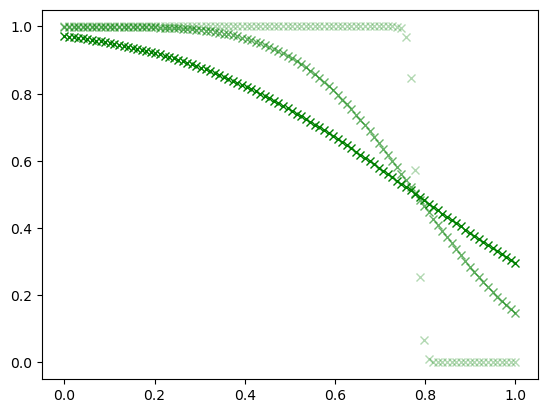

In [3]:
conversion_probability = lambda p,t: scipy.stats.norm.cdf(5*(1-p)-1,0.1,2*(t+5)/T)

for p in np.linspace(0,1,100):
    plt.plot(p, conversion_probability(p, 1), 'x', c = 'g', alpha = 0.3)
for p in np.linspace(0,1,100):
    plt.plot(p, conversion_probability(p, 100), 'x', c = 'g', alpha = 0.6)
for p in np.linspace(0,1,100):
    plt.plot(p, conversion_probability(p, 200), 'x', c='g')
plt.show()

In [4]:
# reward function
def reward_function(price, n_sales):
    return (price-cost)*n_sales
maximum_profit = reward_function(max_price, n_customers)

# profit curve
def profit_curve(price, t):
    return reward_function(price, n_customers*conversion_probability(price, t))

In [5]:
expected_clairvoyant_rewards = []
middle_rewards = []

for t in range(T):
    def wrap(price):
        return 1/profit_curve(price, t)
    best_price = scipy.optimize.minimize(wrap, x0 = 0.5, bounds = [(0,1)])
    print(f'Optimization procedure ended with success: {best_price.success}, Best price at time {t} = {best_price.x[0]}')
    middle_rewards.append(profit_curve(0.5, t))
    expected_clairvoyant_rewards.append(profit_curve(best_price.x[0], t))

Optimization procedure ended with success: True, Best price at time 0 = 0.7544393125413691
Optimization procedure ended with success: True, Best price at time 1 = 0.7502153409569638
Optimization procedure ended with success: True, Best price at time 2 = 0.7461620856212243
Optimization procedure ended with success: True, Best price at time 3 = 0.742254860512676
Optimization procedure ended with success: True, Best price at time 4 = 0.7384788323530949
Optimization procedure ended with success: True, Best price at time 5 = 0.7348271405159447
Optimization procedure ended with success: True, Best price at time 6 = 0.7312878250926236
Optimization procedure ended with success: True, Best price at time 7 = 0.727854210413208
Optimization procedure ended with success: True, Best price at time 8 = 0.7245209588887339
Optimization procedure ended with success: True, Best price at time 9 = 0.72128259908029
Optimization procedure ended with success: True, Best price at time 10 = 0.7181321961188308
Op

Optimization procedure ended with success: True, Best price at time 139 = 0.6461046457937322
Optimization procedure ended with success: True, Best price at time 140 = 0.6468173021369632
Optimization procedure ended with success: True, Best price at time 141 = 0.6475387301062632
Optimization procedure ended with success: True, Best price at time 142 = 0.6482688076844381
Optimization procedure ended with success: True, Best price at time 143 = 0.6490073971299527
Optimization procedure ended with success: True, Best price at time 144 = 0.6497543660454519
Optimization procedure ended with success: True, Best price at time 145 = 0.6505096066794408
Optimization procedure ended with success: True, Best price at time 146 = 0.6512729689325988
Optimization procedure ended with success: True, Best price at time 147 = 0.6520443552732567
Optimization procedure ended with success: True, Best price at time 148 = 0.6528236274759489
Optimization procedure ended with success: True, Best price at time 14

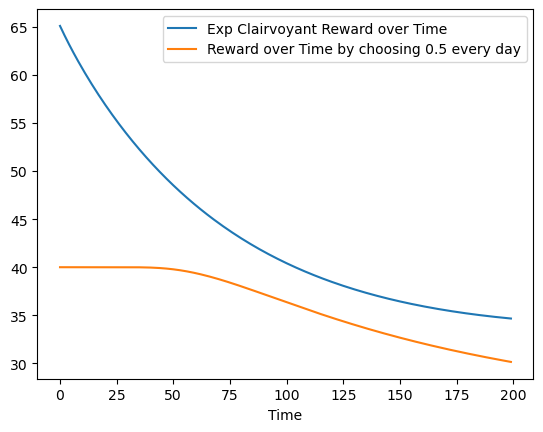

In [6]:
plt.plot(range(T), expected_clairvoyant_rewards, label='Exp Clairvoyant Reward over Time')
plt.plot(range(T), middle_rewards, label='Reward over Time by choosing 0.5 every day')
plt.xlabel('Time')
plt.legend()

In [7]:
# initialize agennt and environment
gp_agent = GPUCBAgent(T)
env = StochasticPricingEnvironment(conversion_probability=conversion_probability, cost=cost)
gp_agent_rewards = np.array([])
for t in range(T):
    p_t = gp_agent.pull_arm()
    d_t, r_t = env.round(p_t, n_t=n_customers)
    gp_agent.update(r_t/n_customers)
    gp_agent_rewards = np.append(gp_agent_rewards, r_t)
    print(f"day: {t}")
    print(f"price: {p_t}")
    print(f"revenue: {r_t}")
    print("----------------------------")

day: 0
price: 0.5
revenue: 40.0
----------------------------
day: 1
price: 0.5
revenue: 40.0
----------------------------
day: 2
price: 0.5
revenue: 40.0
----------------------------
day: 3
price: 1.0
revenue: 0.0
----------------------------
day: 4
price: 0.0
revenue: -10.0
----------------------------
day: 5
price: 0.5830224223513435
revenue: 48.30224223513435
----------------------------
day: 6
price: 0.613766162641937
revenue: 51.3766162641937
----------------------------
day: 7
price: 0.6329900954772183
revenue: 53.29900954772183
----------------------------
day: 8
price: 0.6447713746511438
revenue: 54.47713746511438
----------------------------
day: 9
price: 0.6524137253164234
revenue: 55.24137253164234
----------------------------
day: 10
price: 0.6577143467830486
revenue: 55.771434678304864
----------------------------
day: 11
price: 0.6616036497923538
revenue: 56.160364979235375
----------------------------
day: 12
price: 0.6645950994115447
revenue: 56.45950994115447
---------

day: 94
price: 0.6598560843055556
revenue: 40.86949415430556
----------------------------
day: 95
price: 0.6598534209575202
revenue: 38.6298860460689
----------------------------
day: 96
price: 0.6598432012822347
revenue: 38.06933768719196
----------------------------
day: 97
price: 0.6598322085936805
revenue: 42.54724785311972
----------------------------
day: 98
price: 0.6598148862013734
revenue: 40.30667180649888
----------------------------
day: 99
price: 0.659826171991208
revenue: 42.54678907133181
----------------------------
day: 100
price: 0.6598204735963724
revenue: 37.50797173095695
----------------------------
day: 101
price: 0.659802545883098
revenue: 43.664598578881645
----------------------------
day: 102
price: 0.6598184618603128
revenue: 33.589107711618766
----------------------------
day: 103
price: 0.6598080365467458
revenue: 41.42579470445919
----------------------------
day: 104
price: 0.6598087633493471
revenue: 38.066995907755604
----------------------------
day: 

day: 189
price: 0.6597835777350372
revenue: 34.70658181957231
----------------------------
day: 190
price: 0.6597842790394747
revenue: 34.70662530044743
----------------------------
day: 191
price: 0.6597860421697708
revenue: 35.26652065669556
----------------------------
day: 192
price: 0.6597705002439206
revenue: 36.94485301609876
----------------------------
day: 193
price: 0.6597857873603284
revenue: 35.266504603700696
----------------------------
day: 194
price: 0.6597749457090543
revenue: 35.825596525379474
----------------------------
day: 195
price: 0.659775595691682
revenue: 35.82563812426765
----------------------------
day: 196
price: 0.6597972148386427
revenue: 31.90844124580264
----------------------------
day: 197
price: 0.6597932246714584
revenue: 36.94635282831626
----------------------------
day: 198
price: 0.6597688216788014
revenue: 38.064279874158494
----------------------------
day: 199
price: 0.6597819163492981
revenue: 35.82604264635508
--------------------------